In [177]:
import pandas as pd
import random
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [98]:
class dataproc:
  """A simple class for ranking detectors by speed and occupancy"""
  def __init__(self,path):
    self.path = path
    self.n = 1
    self.days = [2,3]

  def read_csv_format(self):
    df = pd.read_csv(self.path)
    df['datetime'] = pd.to_datetime(df['datetime'])
    
    return df
  
  def pick_random(self):
    # df is dataframe
    # n is the number of detectors to filter
    df = self.read_csv_format()
    unique_detectors = df['detector_id'].unique()
    select_detectors = random.sample(unique_detectors.tolist(),self.n)
    df_filter = df[df['detector_id'].isin(select_detectors)]
    return df_filter


  def visualize(self, df):
    return df['occupancy'].plot.hist(), df.plot(x='datetime',y='occupancy')

  def split_data(self,df):
    df['day'] = df['datetime'].dt.day 
    df['hour']= df['datetime'].dt.hour
    df = df[(df['hour']>=6) & (df['hour']<=20) ]
    return df[df['day']==self.days[0]],df[df['day']==self.days[1]]


In [99]:
path = '/content/gdrive/My Drive/CVENG_8160/data/delay_bottleneck.csv'
dp = dataproc(path)

In [100]:
df = dp.pick_random()

In [42]:
df.head()

,detector_id,travelway,direction,loc,datetime,speed,volume,occupancy,congested,long,lat,day
309075,MI070W215.9D,70,West,217.2,2017-09-01 02:09:00,69.432900,2.099567,1.435065,0.0,-90.735199,38.803299,1
309076,MI070W215.9D,70,West,217.7,2017-09-01 02:09:00,65.883117,1.883117,1.467532,0.0,-90.735199,38.803299,1
309077,MI070W215.9D,70,West,218.2,2017-09-01 02:09:00,62.333333,1.666667,1.500000,0.0,-90.735199,38.803299,1
309078,MI070W215.9D,70,West,217.2,2017-09-01 02:44:00,71.185606,1.045455,1.102273,0.0,-90.735199,38.803299,1
309079,MI070W215.9D,70,West,217.7,2017-09-01 02:44:00,53.780303,1.272727,1.613636,0.0,-90.735199,38.803299,1


(<matplotlib.axes._subplots.AxesSubplot at 0x7fd9577567b8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd9575225c0>)

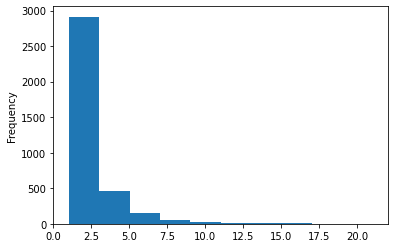

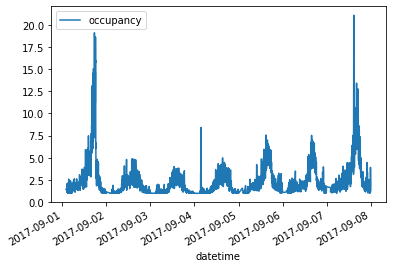

In [43]:
dp.visualize(df)

In [101]:
[df1,df2] = dp.split_data(df)

In [102]:
df1.head()

,detector_id,travelway,direction,loc,datetime,speed,volume,occupancy,congested,long,lat,day,hour
475480,MI270E002.4D,270,East,5.3,2017-09-02 06:09:00,46.018957,1.027488,1.0,0.0,-90.380203,38.5154,2,6
475481,MI270E002.4D,270,East,5.8,2017-09-02 06:09:00,45.936019,1.032227,1.0,0.0,-90.380203,38.5154,2,6
475482,MI270E002.4D,270,East,6.3,2017-09-02 06:09:00,45.853081,1.036967,1.0,0.0,-90.380203,38.5154,2,6
475483,MI270E002.4D,270,East,6.8,2017-09-02 06:09:00,45.770142,1.041706,1.0,0.0,-90.380203,38.5154,2,6
475484,MI270E002.4D,270,East,7.3,2017-09-02 06:09:00,45.687204,1.046445,1.0,0.0,-90.380203,38.5154,2,6


In [103]:
df2.head()

,detector_id,travelway,direction,loc,datetime,speed,volume,occupancy,congested,long,lat,day,hour
477023,MI270E002.4D,270,East,9.0,2017-09-03 06:09:00,64.838863,1.156398,1.156398,0.0,-90.380203,38.5154,3,6
477024,MI270E002.4D,270,East,9.5,2017-09-03 06:09:00,64.447867,1.168246,1.168246,0.0,-90.380203,38.5154,3,6
477025,MI270E002.4D,270,East,10.0,2017-09-03 06:09:00,64.056872,1.180095,1.180095,0.0,-90.380203,38.5154,3,6
477026,MI270E002.4D,270,East,10.5,2017-09-03 06:09:00,63.665877,1.191943,1.191943,0.0,-90.380203,38.5154,3,6
477027,MI270E002.4D,270,East,11.0,2017-09-03 06:09:00,63.274882,1.203791,1.203791,0.0,-90.380203,38.5154,3,6


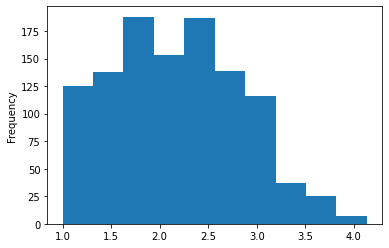

In [104]:
df1['occupancy'].plot.hist()

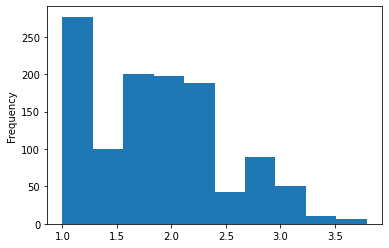

In [105]:
df2['occupancy'].plot.hist()

In [106]:
print ('means of both datasets')
print (df1['speed'].mean(),df2['speed'].mean())
print ('\nvariance between both datasets')
print (df1['speed'].var(),df2['speed'].var())

means of both datasets
63.20093733842355 64.75582194227405

variance between both datasets
24.47444026583503 14.514858694059894


##Use Dicker fuller test to test for significance

In [165]:
def cor_coeff(df1, df2,column):
  mu1,std1 = df1[column].values.mean(), df1[column].values.std()
  mu2, std2 = df2[column].values.mean(), df2[column].values.std()

  xcor,ycor = (df1[column]-mu1).values, (df2[column]-mu2).values
  if not (len(xcor) == len(ycor)):
    xcor = np.resize(xcor,ycor.shape)
  
  x_comp = np.divide(xcor,std1)
  y_comp = np.divide(ycor,std2)
  
  numerator = np.sum(np.multiply(xcor,ycor))
  denominator = np.sqrt((np.sum(xcor**2)*np.sum(ycor**2)))
  coeff = numerator/denominator

  return coeff


In [234]:
coeff = cor_coeff(df1, df2, 'speed')
print (coeff)

0.28287364315777425


In [233]:
# print (np.corrcoef(xcor,ycor))

In [235]:
def cor_coeff_array(x, y):
  mu1,std1 = np.mean(x), np.std(x)
  mu2, std2 = np.mean(y), np.std(y)

  xcor,ycor = x-mu1, y-mu2
  if not (len(xcor) == len(ycor)):
    xcor = np.resize(xcor,ycor.shape)
  
  x_comp = np.divide(xcor,std1)
  y_comp = np.divide(ycor,std2)
  
  numerator = np.sum(np.multiply(xcor,ycor))
  denominator = np.sqrt((np.sum(xcor**2)*np.sum(ycor**2)))
  coeff = numerator/denominator

  return coeff

In [236]:
# x_data = volume[0:105]
# y_data = volume[5:107]
# print (cor_coeff_array(x_data, y_data))

In [243]:
window = 2
lag = 1
data_len = 400; # check 50 through 500
volume = df1['volume'].values; # check for occupancy and speed
corrs = []
for data_range in range(0,len(volume)-(data_len+lag),window):
  x_data = volume[0:data_range+data_len]
  y_data = volume[data_range+lag:data_range+data_len+lag]
  corrs.append(cor_coeff_array(x_data, y_data))

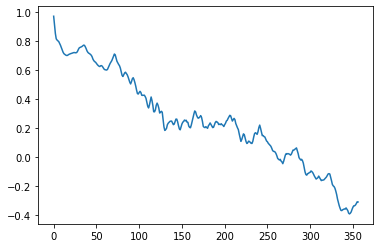

In [244]:
plt.plot(corrs)

In [161]:
print (cor)

0.6437052287030149
